<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Relativity_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Special Relativity Demonstrations
Interval invariance check:
------------------------------------------------------------

Test case 1 (timelike):
  Events: (t1,x1)=(0.0s,0.0 ls), (t2,x2)=(2.0s,1.0 ls)
  s² in rest frame: -3.000000e+00 s²
  v=0.00c: s²=-3.000000e+00 s², diff=0.00e+00 s²
  v=0.50c: s²=-3.000000e+00 s², diff=1.07e-15 s²
  v=0.80c: s²=-3.000000e+00 s², diff=1.07e-15 s²
  v=0.95c: s²=-3.000000e+00 s², diff=3.56e-16 s²

Test case 2 (lightlike):
  Events: (t1,x1)=(0.0s,0.0 ls), (t2,x2)=(1.0s,1.0 ls)
  s² in rest frame: 0.000000e+00 s²
  v=0.00c: s²=0.000000e+00 s², diff=0.00e+00 s²
  v=0.50c: s²=0.000000e+00 s², diff=0.00e+00 s²
  v=0.80c: s²=4.450600e-17 s², diff=4.45e-17 s²
  v=0.95c: s²=8.344875e-17 s², diff=8.34e-17 s²

Test case 3 (spacelike):
  Events: (t1,x1)=(0.0s,0.0 ls), (t2,x2)=(1.0s,1.5 ls)
  s² in rest frame: 1.250000e+00 s²
  v=0.00c: s²=1.250000e+00 s², diff=0.00e+00 s²
  v=0.50c: s²=1.250000e+00 s², diff=1.78e-16 s²
  v=0.80c: s²=1.250000e+00 s², diff=5.34e-1

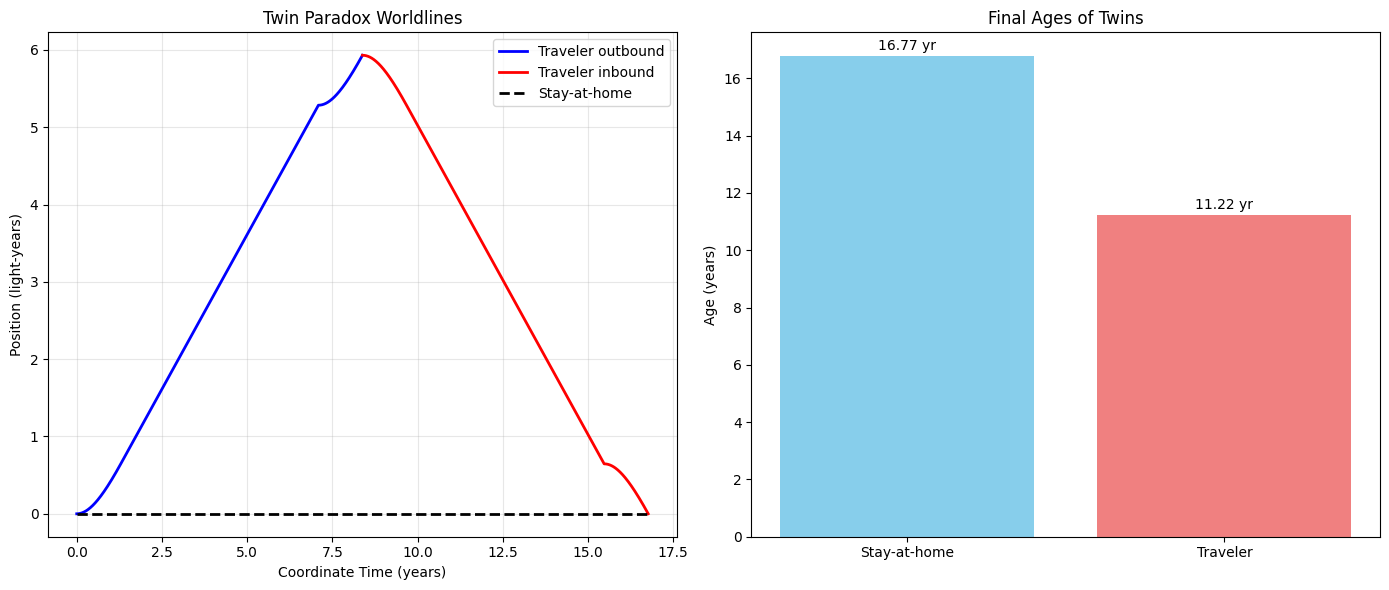

Doppler shift example: v = 0.50c
  Rest frequency: 1000 Hz
  Observed frequency: 577.4 Hz
  Shift factor: 0.577


In [1]:
"""

Author: Dr. Temesgen Deressa
11/25/2025
For Educational and Research purpose only

relativity_demos.py

Enhanced special relativity demonstrations with:
 - Minkowski interval invariance checks
 - Time dilation and length contraction examples
 - Smooth twin-paradox simulation with finite acceleration
 - Interactive plots with proper time calculations
 - Additional visualization tools

Dependencies: numpy, matplotlib, scipy
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Physical constants
c = 299792458.0  # speed of light (m/s)

# -----------------------
# Special relativity helpers
# -----------------------
def gamma(v):
    """Lorentz factor for speed v (|v| < c)."""
    return 1.0 / np.sqrt(1 - (v / c) ** 2)

def lorentz_transform_event(t, x, v):
    """1D Lorentz transform of event (t, x) to frame moving at +v."""
    g = gamma(v)
    t_p = g * (t - v * x / c**2)
    x_p = g * (x - v * t)
    return t_p, x_p

def spacetime_interval_sq(t1, x1, t2, x2):
    """Minkowski interval squared: s^2 = -(c*dt)^2 + (dx)^2."""
    dt = t2 - t1
    dx = x2 - x1
    return -(c * dt) ** 2 + dx ** 2

def length_contraction(L0, v):
    """Length contraction for proper length L0 moving at speed v."""
    return L0 / gamma(v)

# -----------------------
# Enhanced interval invariance check
# -----------------------
def check_interval_invariance():
    """Check interval invariance with multiple test cases."""
    test_cases = [
        (0.0, 0.0, 2.0, 0.5 * c * 2.0),  # timelike
        (0.0, 0.0, 1.0, c * 1.0),        # lightlike
        (0.0, 0.0, 1.0, 1.5 * c * 1.0)   # spacelike
    ]

    velocities = [0.0, 0.5*c, 0.8*c, 0.95*c]

    print("Interval invariance check:")
    print("-" * 60)

    for i, (t1, x1, t2, x2) in enumerate(test_cases):
        s2_rest = spacetime_interval_sq(t1, x1, t2, x2)
        interval_type = "timelike" if s2_rest < 0 else "lightlike" if s2_rest == 0 else "spacelike"

        print(f"\nTest case {i+1} ({interval_type}):")
        print(f"  Events: (t1,x1)=({t1:.1f}s,{x1/c:.1f} ls), (t2,x2)=({t2:.1f}s,{x2/c:.1f} ls)")
        print(f"  s² in rest frame: {s2_rest/c**2:.6e} s²")

        for v in velocities:
            t1p, x1p = lorentz_transform_event(t1, x1, v)
            t2p, x2p = lorentz_transform_event(t2, x2, v)
            s2_moving = spacetime_interval_sq(t1p, x1p, t2p, x2p)
            diff = abs(s2_rest - s2_moving)
            print(f"  v={v/c:.2f}c: s²={s2_moving/c**2:.6e} s², diff={diff/c**2:.2e} s²")
    print()

# -----------------------
# Enhanced time dilation and length contraction examples
# -----------------------
def relativistic_effects_example(v_fraction=0.9):
    """Demonstrate both time dilation and length contraction."""
    v = v_fraction * c
    g = gamma(v)

    tau = 1.0  # proper time in moving frame (s)
    t_lab = g * tau

    L0 = 1.0  # proper length (m)
    L_contracted = length_contraction(L0, v)

    print("Relativistic effects example:")
    print(f"  v = {v_fraction:.3f} c -> gamma = {g:.6f}")
    print(f"  Time dilation: τ = {tau} s -> t = {t_lab:.6f} s")
    print(f"  Length contraction: L₀ = {L0} m -> L = {L_contracted:.6f} m")
    print(f"  Reciprocal check: τ/t = {tau/t_lab:.6f}, L/L₀ = {L_contracted/L0:.6f}")
    print()

# -----------------------
# Improved smooth twin paradox with better visualization
# -----------------------
def hyperbolic_motion_proper(a, tau):
    """Hyperbolic motion with constant proper acceleration."""
    arg = a * tau / c
    t = (c / a) * np.sinh(arg)
    x = (c**2 / a) * (np.cosh(arg) - 1.0)
    v = np.tanh(arg) * c
    return t, x, v

def inverse_hyperbolic_to_proper_time(a, v_target):
    """Proper time to reach target velocity from rest."""
    return (c / a) * np.arctanh(v_target / c)

def compute_proper_time_segment(t_coord, x_coord):
    """Compute proper time along a worldline segment numerically."""
    if len(t_coord) < 2:
        return 0.0

    tau_total = 0.0
    for i in range(len(t_coord)-1):
        dt = t_coord[i+1] - t_coord[i]
        dx = x_coord[i+1] - x_coord[i]
        if dt > 0:
            v = dx / dt
            dtau = dt * np.sqrt(1 - (v/c)**2)
            tau_total += dtau

    return tau_total

def smooth_twin_paradox_enhanced(a=1.0, v_cruise_fraction=0.8, d_coast=1e15, plot=True):
    """
    Enhanced twin paradox simulation with proper time tracking and better visualization.
    """
    v_cruise = v_cruise_fraction * c

    # Acceleration phase
    tau_accel = inverse_hyperbolic_to_proper_time(a, v_cruise)
    t_accel, x_accel, v_final = hyperbolic_motion_proper(a, tau_accel)

    # Coasting phase
    remaining = d_coast - x_accel
    if remaining < 0:
        raise ValueError("d_coast too small - increase distance or reduce acceleration")

    t_coast = remaining / v_cruise
    tau_coast = t_coast * np.sqrt(1 - (v_cruise / c) ** 2)

    # Outbound summary
    t_outbound_coord = t_accel + t_coast + t_accel
    tau_outbound = tau_accel + tau_coast + tau_accel

    # Return trip (symmetric)
    total_coord_time = 2.0 * t_outbound_coord
    total_proper_traveler = 2.0 * tau_outbound
    total_proper_stationary = total_coord_time

    # Build detailed worldlines
    # Outbound acceleration
    taus1 = np.linspace(0, tau_accel, 100)
    t1, x1, _ = hyperbolic_motion_proper(a, taus1)

    # Coast outbound
    t2 = np.linspace(t1[-1], t1[-1] + t_coast, 100)
    x2 = x1[-1] + v_cruise * (t2 - t2[0])

    # Decel outbound
    taus3 = np.linspace(0, tau_accel, 100)
    t3_rel, x3_rel, _ = hyperbolic_motion_proper(a, taus3)
    t3 = t2[-1] + t3_rel
    x3 = x2[-1] + (x3_rel - x3_rel[0])

    # Combine outbound
    t_out = np.concatenate([t1, t2, t3])
    x_out = np.concatenate([x1, x2, x3])

    # Return trip (mirror)
    t_return = t_out[-1] + (t_out - t_out[0])
    x_return = x_out[-1] - (x_out - x_out[0])

    # Stationary twin
    t_stationary = np.linspace(0, t_return[-1], 400)
    x_stationary = np.zeros_like(t_stationary)

    # Compute proper times numerically for verification
    tau_traveler_num = (compute_proper_time_segment(t_out, x_out) +
                       compute_proper_time_segment(t_return, x_return))
    tau_stationary_num = compute_proper_time_segment(t_stationary, x_stationary)

    # Print comprehensive results
    sec2years = 1.0 / (3600 * 24 * 365.25)

    print("Enhanced Twin Paradox Analysis:")
    print("=" * 60)
    print(f"Parameters: a = {a:.2e} m/s², v_cruise = {v_cruise_fraction:.2f}c, d_coast = {d_coast/c/86400:.2f} light-days")
    print(f"\nOutbound journey:")
    print(f"  Acceleration: τ = {tau_accel*sec2years:.4f} yr, t = {t_accel*sec2years:.4f} yr, x = {x_accel/c/86400:.2f} ld")
    print(f"  Coasting:     τ = {tau_coast*sec2years:.4f} yr, t = {t_coast*sec2years:.4f} yr")
    print(f"  Deceleration: τ = {tau_accel*sec2years:.4f} yr, t = {t_accel*sec2years:.4f} yr")
    print(f"\nRound trip results:")
    print(f"  Stay-at-home twin: {total_proper_stationary*sec2years:.6f} years")
    print(f"  Traveler:          {total_proper_traveler*sec2years:.6f} years")
    print(f"  Age difference:    {(total_proper_stationary - total_proper_traveler)*sec2years:.6f} years")
    print(f"  Numerical check - Traveler: {tau_traveler_num*sec2years:.6f} years")
    print(f"  Numerical check - Stationary: {tau_stationary_num*sec2years:.6f} years")
    print()

    if plot:
        plot_enhanced_twin_paradox(t_out, x_out, t_return, x_return,
                                 t_stationary, x_stationary, sec2years)

    return {
        "total_coord_time": total_coord_time,
        "total_proper_traveler": total_proper_traveler,
        "total_proper_stationary": total_proper_stationary,
        "t_traveler_years": total_proper_traveler * sec2years,
        "t_stationary_years": total_proper_stationary * sec2years
    }

def plot_enhanced_twin_paradox(t_out, x_out, t_return, x_return, t_stationary, x_stationary, sec2years):
    """Create enhanced visualization of twin paradox."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Convert to years and light-years for better interpretation
    t_out_years = t_out * sec2years
    x_out_ly = x_out / (c * 365.25 * 24 * 3600)
    t_return_years = t_return * sec2years
    x_return_ly = x_return / (c * 365.25 * 24 * 3600)
    t_stat_years = t_stationary * sec2years
    x_stat_ly = x_stationary / (c * 365.25 * 24 * 3600)

    # Worldline plot
    ax1.plot(t_out_years, x_out_ly, 'b-', linewidth=2, label='Traveler outbound')
    ax1.plot(t_return_years, x_return_ly, 'r-', linewidth=2, label='Traveler inbound')
    ax1.plot(t_stat_years, x_stat_ly, 'k--', linewidth=2, label='Stay-at-home')
    ax1.set_xlabel('Coordinate Time (years)')
    ax1.set_ylabel('Position (light-years)')
    ax1.set_title('Twin Paradox Worldlines')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Proper time comparison
    travelers = ['Stay-at-home', 'Traveler']
    ages = [t_stat_years[-1], (compute_proper_time_segment(t_out, x_out) +
                              compute_proper_time_segment(t_return, x_return)) * sec2years]

    ax2.bar(travelers, ages, color=['skyblue', 'lightcoral'])
    ax2.set_ylabel('Age (years)')
    ax2.set_title('Final Ages of Twins')
    for i, v in enumerate(ages):
        ax2.text(i, v + 0.1, f'{v:.2f} yr', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# -----------------------
# Additional demo: Relativistic Doppler effect
# -----------------------
def doppler_shift(v, freq_rest):
    """Calculate relativistic Doppler shift."""
    g = gamma(v)
    return freq_rest * np.sqrt((1 - v/c) / (1 + v/c))  # for source moving away

# -----------------------
# Main execution
# -----------------------
if __name__ == "__main__":
    print("Special Relativity Demonstrations")
    print("=" * 50)

    # 1) Comprehensive interval invariance check
    check_interval_invariance()

    # 2) Relativistic effects
    relativistic_effects_example(0.6)
    relativistic_effects_example(0.9)
    relativistic_effects_example(0.99)

    # 3) Enhanced twin paradox
    results = smooth_twin_paradox_enhanced(a=9.8, v_cruise_fraction=0.8, d_coast=5e16)

    # 4) Doppler effect example
    v_test = 0.5 * c
    f_rest = 1000  # Hz
    f_observed = doppler_shift(v_test, f_rest)
    print(f"Doppler shift example: v = {v_test/c:.2f}c")
    print(f"  Rest frequency: {f_rest} Hz")
    print(f"  Observed frequency: {f_observed:.1f} Hz")
    print(f"  Shift factor: {f_observed/f_rest:.3f}")